In [1]:
# !pip install pandas scikit-learn matplotlib numpy seaborn unidecode wordcloud

import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from unidecode import unidecode
import re
from wordcloud import WordCloud

In [2]:
file_path = "./DATA/SBQ_CSV.csv"
data = pd.read_csv(file_path, delimiter=",", quotechar='"', on_bad_lines='skip')

Universities = data['Universities'].dropna()
print(len(Universities))

all_Universities2 = Universities.str.split(r'[;,]').explode()
print(len(all_Universities2))

1876
4327


In [3]:
import re

def reverse_map_Universitie(Universitie, mapping):
    for i in range(len(mapping)):
        if mapping[i][0] in Universitie or mapping[i][1] in Universitie:
            return mapping[i][0] 
    else:
        return Universitie

data2 = pd.read_csv("./DATA/csv_universities_states.csv", delimiter=",", quotechar='"', on_bad_lines='skip')
universitiesAb = data2.to_numpy() 

Universities = data['Universities'].dropna()  
Universities = Universities.apply(lambda x: unidecode(x.strip()))

all_Universities = Universities.str.split(r'[;,]').explode().str.strip().str.lower()
all_Universities = all_Universities.str.replace(r'^\d+\s*-\s*', '', regex=True)

all_Universities = all_Universities.drop_duplicates(keep='first')
all_Universities = list(set(all_Universities))
print(len(all_Universities))

def filtrar_palavras_unicas(nome_arquivo_csv, target_column, nome_arquivo_saida):
    df = pd.read_csv(nome_arquivo_csv, delimiter=",", quotechar='"', on_bad_lines='skip')

    if target_column not in df.columns:
        raise ValueError(f"Column '{target_column}' not found in CSV file.")

    universidades_achatadas = []

    for universidades_str in df[target_column].dropna():
        if isinstance(universidades_str, str):
            universidades = universidades_str.split(';')
            universidades_achatadas.extend([uni.strip() for uni in universidades])

    universidades_normalizadas = [re.sub(r'[^\w\s]', '', uni.lower()) for uni in universidades_achatadas]

    contagem = pd.Series(universidades_normalizadas).value_counts().reset_index()
    contagem.columns = [target_column, 'Frequency']

    contagem.to_csv(nome_arquivo_saida, index=False)

    print(f"Palavras únicas + frequências da coluna '{target_column}' salvas em '{nome_arquivo_saida}'.")

csv_file_name = file_path
target_column = "Universities"
output_filename = "DATA/csv_universities2.csv"

filtrar_palavras_unicas(csv_file_name, target_column, output_filename)


def plot_comparison_bar(counts_a, counts_b, label_a="Year A", label_b="Year B",
                        bar_colors=("red", "purple"), title="Universitie Frequency Comparison", n=20):
    combined_Universities = (counts_a + counts_b).most_common(n)
    Universities = [k for k, _ in combined_Universities]

    
    df = pd.DataFrame({
        label_a: [counts_a.get(k, 0) for k in Universities],
        label_b: [counts_b.get(k, 0) for k in Universities]
    }, index=Universities)

    ax = df.plot(kind='barh', figsize=(10, 6), color=bar_colors)

   
    for i, Universitie in enumerate(df.index):
        val_a = df.loc[Universitie, label_a]
        val_b = df.loc[Universitie, label_b]
        
        if val_a > 0:
            ax.text(val_a + 0.5, i - 0.15, str(val_a), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[0], edgecolor='none', boxstyle='round,pad=0.2'))
        
        if val_b > 0:
            ax.text(val_b + 0.5, i + 0.15, str(val_b), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[1], edgecolor='none', boxstyle='round,pad=0.2'))

    plt.xlabel("Frequency")
    plt.ylabel("Universitie")
    #plt.title(title)
    plt.gca().invert_yaxis() 
    plt.tight_layout()
    plt.show()

def plot_Universitie_wordcloud(Universitie_counter, title="WordCloud of Unified Universities"):
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Universitie_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()
    

2282
Palavras únicas + frequências da coluna 'Universities' salvas em 'DATA/csv_universities2.csv'.


In [4]:
txtwrtting = ""
def reverse_map_Universitie(Universitie, mapping):
    
    for i in range(len(mapping)):        
        if mapping[i][0].lower() in Universitie.lower() or mapping[i][1].lower() in Universitie.lower() or mapping[i][2].lower() in Universitie.lower():
            return f'{mapping[i][1]} ({mapping[i][2]})'    
    return Universitie

data2 = pd.read_csv("DATA/csv_universities_states.csv", delimiter=",", quotechar='"', on_bad_lines='skip')


universitiesAb = data2.to_numpy() 
Universities = data['Universities'].dropna()

all_Universities = Universities.str.split(r'[;,]').explode().str.strip().str.lower()
print(len(all_Universities))

df = all_Universities.reset_index()
df_merged = df.groupby("index").agg(lambda x: ', '.join(set(x))).reset_index()

all_Universities2 = df_merged['Universities'].str.split(r'[;,]').explode().str.strip().str.lower()

mapped_Universities = all_Universities2.apply(lambda x: reverse_map_Universitie(x, universitiesAb))

Universitie_counts = Counter(mapped_Universities)



4327


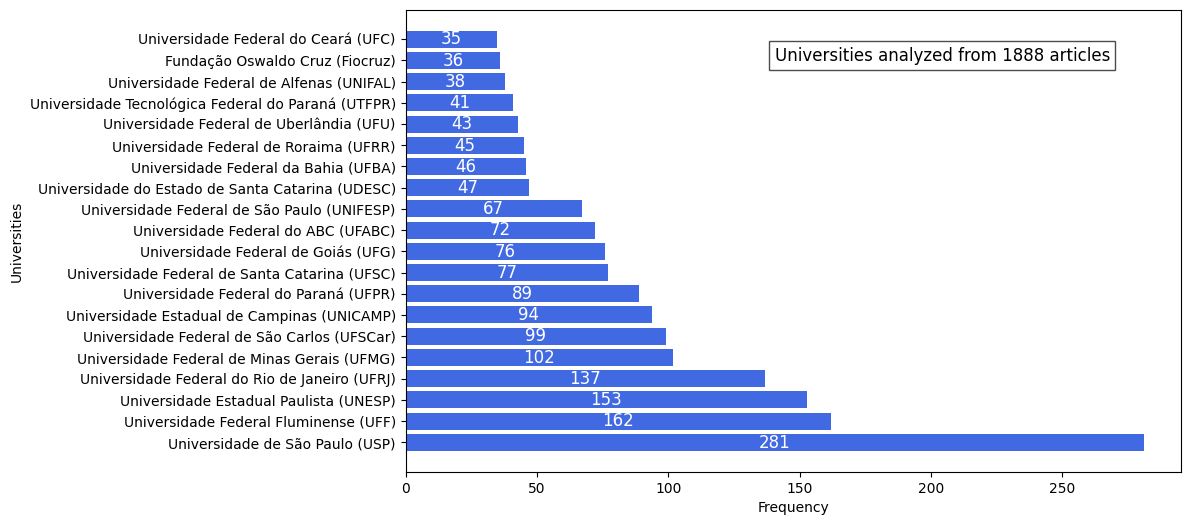

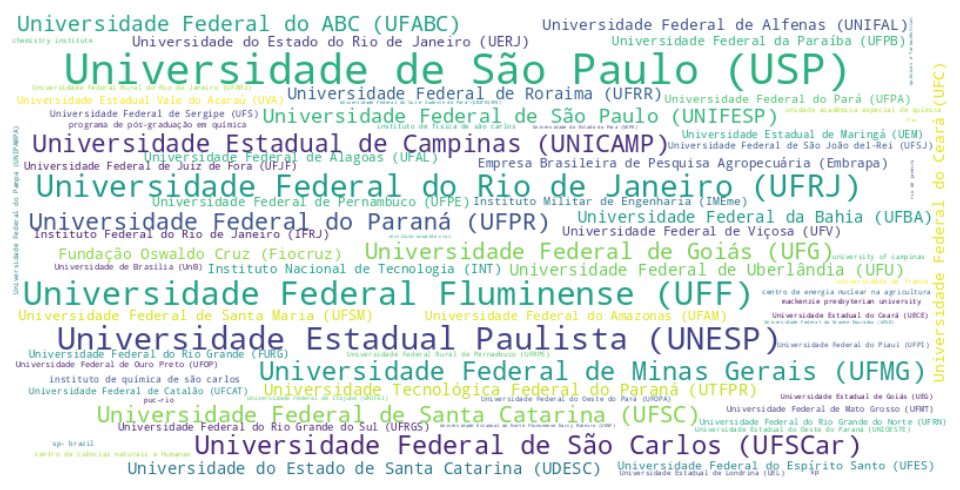

In [5]:
top_Universities = Universitie_counts.most_common(20)

Universities, counts = zip(*top_Universities)

plt.figure(figsize=(10, 6))
bars = plt.barh(Universities, counts, color='royalblue')

for bar, count in zip(bars, counts):
    plt.text(bar.get_width() / 2,
             bar.get_y() + bar.get_height() / 2,
             str(count), 
             ha='center', va='center', fontsize=12, color='white')

plt.text(max(counts) * 0.5, 18 , f'Universities analyzed from 1888 articles', 
         fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.xlabel('Frequency')
plt.ylabel('Universities')
plt.gca()  
plt.show()



plot_Universitie_wordcloud(Universitie_counts)


In [6]:
data_2019 = data[data['Year'] == 2019]

data2 = pd.read_csv("DATA/csv_universities_states.csv", delimiter=",", quotechar='"', on_bad_lines='skip')

universitiesAb = data2.to_numpy() 
Universities = data_2019['Universities'].dropna()

all_Universities = Universities.str.split(r'[;,]').explode().str.strip().str.lower()

df = all_Universities.reset_index()
df_merged = df.groupby("index").agg(lambda x: ', '.join(set(x))).reset_index()

all_Universities2 = df_merged['Universities'].str.split(r'[;,]').explode().str.strip().str.lower()

mapped_Universities = all_Universities2.apply(lambda x: reverse_map_Universitie(x, universitiesAb))

print(len(all_Universities2))
print(len(mapped_Universities))

Universitie_counts_2019 = Counter(mapped_Universities)


2463
2463


In [7]:
data_2024 = data[data['Year'] == 2024]

data2 = pd.read_csv("DATA/csv_universities_states.csv", delimiter=",", quotechar='"', on_bad_lines='skip')

universitiesAb = data2.to_numpy() 
Universities = data_2024['Universities'].dropna()

all_Universities = Universities.str.split(r'[;,]').explode().str.strip().str.lower()
print(all_Universities)

df = all_Universities.reset_index()
df_merged = df.groupby("index").agg(lambda x: ', '.join(set(x))).reset_index()

print(df_merged)
all_Universities2 = df_merged['Universities'].str.split(r'[;,]').explode().str.strip().str.lower()
mapped_Universities = all_Universities2.apply(lambda x: reverse_map_Universitie(x, universitiesAb))

print(mapped_Universities)

Universitie_counts_2024 = Counter(mapped_Universities)

print(len(mapped_Universities))

1124                instituto militar de engenharia (ime)
1125                                politecnico di milano
1125                            federal university of abc
1125                      santa catarina state university
1126    centro de educação tecnológica da fundação ind...
                              ...                        
1886                         instituto de ciências exatas
1886                        departamento de química - uff
1886                 programa de pós-graduação em química
1886                          instituto de química -  uff
1887                                                  ufc
Name: Universities, Length: 1811, dtype: object
     index                                       Universities
0     1124              instituto militar de engenharia (ime)
1     1125  politecnico di milano, federal university of a...
2     1126  cetef/fiec, centro de educação tecnológica da ...
3     1127  university of campinas (unicamp), institute of...
4   

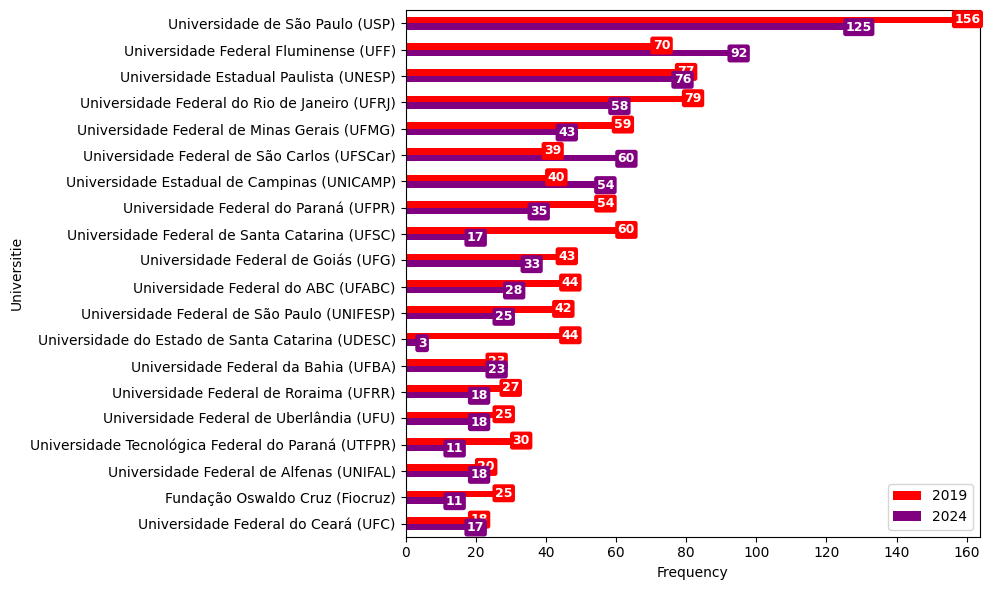

Counter({'Universidade de São Paulo (USP)': 156, 'Universidade Federal do Rio de Janeiro (UFRJ)': 79, 'Universidade Estadual Paulista (UNESP)': 77, 'Universidade Federal Fluminense (UFF)': 70, 'Universidade Federal de Santa Catarina (UFSC)': 60, 'Universidade Federal de Minas Gerais (UFMG)': 59, 'Universidade Federal do Paraná (UFPR)': 54, 'Universidade Federal do ABC (UFABC)': 44, 'Universidade do Estado de Santa Catarina (UDESC)': 44, 'Universidade Federal de Goiás (UFG)': 43, 'Universidade Federal de São Paulo (UNIFESP)': 42, 'Universidade Estadual de Campinas (UNICAMP)': 40, 'Universidade Federal de São Carlos (UFSCar)': 39, 'Universidade Tecnológica Federal do Paraná (UTFPR)': 30, 'Universidade Federal de Roraima (UFRR)': 27, 'Fundação Oswaldo Cruz (Fiocruz)': 25, 'Universidade Federal de Uberlândia (UFU)': 25, 'Universidade Federal da Bahia (UFBA)': 23, 'Universidade do Estado do Rio de Janeiro (UERJ)': 20, 'Universidade Federal de Santa Maria (UFSM)': 20, 'Universidade Federal d

In [ ]:
plot_comparison_bar(
    counts_a=Universitie_counts_2019,
    counts_b=Universitie_counts_2024,
    label_a="2019",
    label_b="2024",
    #title="Universitie Frequency Comparison: 2019 vs 2024"
)

import csv
print(Universitie_counts_2019)

total_2019 = sum(Universitie_counts_2019.values())
total_2024 = sum(Universitie_counts_2024.values())


all_areas = sorted(list(set(Universitie_counts_2019.keys()) | set(Universitie_counts_2024.keys())))

csv_rows = []
csv_rows.append(['Universitie', '2019 Count', '2019 Percentage (%)', '2024 Count', '2024 Percentage (%)', 'Percentage Change (2019 to 2024)'])

for area in all_areas:
    count_2019 = Universitie_counts_2019.get(area, 0)
    count_2024 = Universitie_counts_2024.get(area, 0)

    percentage_2019 = (count_2019 / total_2019 * 100) if total_2019 > 0 else 0
    percentage_2024 = (count_2024 / total_2024 * 100) if total_2024 > 0 else 0

    percentage_change = percentage_2024 - percentage_2019

    csv_rows.append([
        area,
        count_2019,
        f"{percentage_2019:.2f}",
        count_2024,
        f"{percentage_2024:.2f}",
        f"{percentage_change:.2f}" 
    ])


output_filename = 'research_universitie_comparison.csv'

with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(csv_rows)

print(f"CSV file '{output_filename}' created successfully!")
print(f"Total abstracts in 2019: {total_2019}")
print(f"Total abstracts in 2024: {total_2024}")

In [ ]:
def calcByArea(area):
    data_2019 = data[(data['Year'] == 2019) & (data['Area'] == area)]
    print(data_2019)
    print(len(data_2019))

    data2 = pd.read_csv("DATA/csv_universities_states.csv", delimiter=",", quotechar='"', on_bad_lines='skip')

    universitiesAb = data2.to_numpy() 
    Universities = data_2019['Universities'].dropna()

    all_Universities = Universities.str.split(r'[;,]').explode().str.strip().str.lower()

    df = all_Universities.reset_index()
    df_merged = df.groupby("index").agg(lambda x: ', '.join(set(x))).reset_index()

    all_Universities2 = df_merged['Universities'].str.split(r'[;,]').explode().str.strip().str.lower()

    mapped_Universities = all_Universities2.apply(lambda x: reverse_map_Universitie(x, universitiesAb))

    print(len(all_Universities2))
    print(len(mapped_Universities))

    Universitie_counts_2019 = Counter(mapped_Universities)





    data_2024 = data[(data['Year'] == 2024) & (data['Area'] == area)]
    print(len(data_2024))

    data2 = pd.read_csv("DATA/csv_universities_states.csv", delimiter=",", quotechar='"', on_bad_lines='skip')

    universitiesAb = data2.to_numpy() 
    Universities = data_2024['Universities'].dropna()

    all_Universities = Universities.str.split(r'[;,]').explode().str.strip().str.lower()

    df = all_Universities.reset_index()
    df_merged = df.groupby("index").agg(lambda x: ', '.join(set(x))).reset_index()

    all_Universities2 = df_merged['Universities'].str.split(r'[;,]').explode().str.strip().str.lower()

    mapped_Universities = all_Universities2.apply(lambda x: reverse_map_Universitie(x, universitiesAb))

    print(len(all_Universities2))
    print(len(mapped_Universities))

    Universitie_counts_2024 = Counter(mapped_Universities)






    print(Universitie_counts_2019)
    print(Universitie_counts_2024)
    plot_comparison_bar(
        counts_a=Universitie_counts_2019,
        counts_b=Universitie_counts_2024,
        label_a="2019",
        label_b="2024",
    )
    import csv

    total_2019 = sum(Universitie_counts_2019.values())
    total_2024 = sum(Universitie_counts_2024.values())

    all_areas = sorted(list(set(Universitie_counts_2019.keys()) | set(Universitie_counts_2024.keys())))

    csv_rows = []
    csv_rows.append(['Area Code', '2019 Count', '2019 Percentage (%)', '2024 Count', '2024 Percentage (%)', 'Percentage Change (2019 to 2024)'])

    for area in all_areas:
        count_2019 = Universitie_counts_2019.get(area, 0)
        count_2024 = Universitie_counts_2024.get(area, 0)

        percentage_2019 = (count_2019 / total_2019 * 100) if total_2019 > 0 else 0
        percentage_2024 = (count_2024 / total_2024 * 100) if total_2024 > 0 else 0

        percentage_change = percentage_2024 - percentage_2019

        csv_rows.append([
            area,
            count_2019,
            f"{percentage_2019:.2f}", 
            count_2024,
            f"{percentage_2024:.2f}",
            f"{percentage_change:.2f}" 
        ])

   
    output_filename = f'research_area_{area}_comparison.csv'

    # Write to CSV
    with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerows(csv_rows)

    print(f"CSV file '{output_filename}' created successfully!")
    print(f"Total abstracts in 2019: {total_2019}")
    print(f"Total abstracts in 2024: {total_2024}")



      Year Area                                      English title  \
1     2019  ORG  Synthesis of a Schiff Base Compound with Poten...   
2     2019  ORG  Enzymatic hydration of aliphatic and aromatic ...   
15    2019  ORG  Total Synthesis of (+)-Cedrol and Total Synthe...   
16    2019  ORG  [3;3]-Sigmatropic rearrangement of allylaryl e...   
20    2019  ORG  Synthesis of naphthoquinoid compounds with ant...   
...    ...  ...                                                ...   
1085  2019  ORG  Synthesis of a Novel Chiral Catalyst Based on ...   
1090  2019  ORG  Isoprenoids and Antileishmanial Activity of th...   
1099  2019  ORG  Chemical modification of glycerol by etherific...   
1114  2019  ORG  Searching for a Novel Catalyst for Flow-based ...   
1120  2019  ORG  Synthesis of cinnamic derivatives via click ch...   

                                                Authors  \
1     Lucas F. Martins (PG)1; Vivian C. da Silveira ...   
2     Maraylla I. Moraes (PG); Cesar Igle

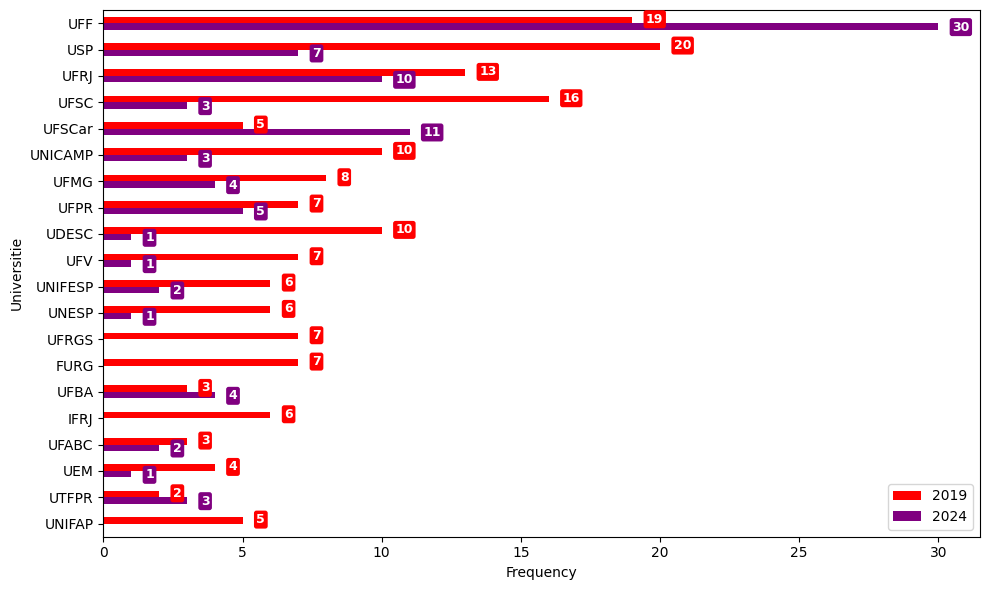

CSV file 'research_area_àurea echevarria)_comparison.csv' created successfully!
Total abstracts in 2019: 320
Total abstracts in 2024: 185


In [10]:
calcByArea('ORG')

     Year Area                                      English title  \
443  2019  HIS  Scientific Glassblowing in Brazil: an Historic...   
528  2019  HIS  The experiment of Luigi Terragno: a chemical r...   

                                               Authors  \
443   Wladmir Teodoro da Silva; Carlos A.L. Filgueiras   
528  Karine Arend*; Ana Margarida Andrade Cardoso; ...   

                                           Contact  \
443  wladmirt@hotmail.com; calfilgueiras@gmail.com   
528                         karinearend@ifc.edu.br   

                                          Universities  \
443               Universidade Federal de Minas Gerais   
528  Instituto Federal Catarinense; IFC-Campus São ...   

                                              Keywords  \
443  Scientific Glassblowing; Glass; History of Sci...   
528  Sulfomandiocato; Fotografia; Experimento; Sínt...   

                                            Highlights Software Used  \
443  Validation of research meth

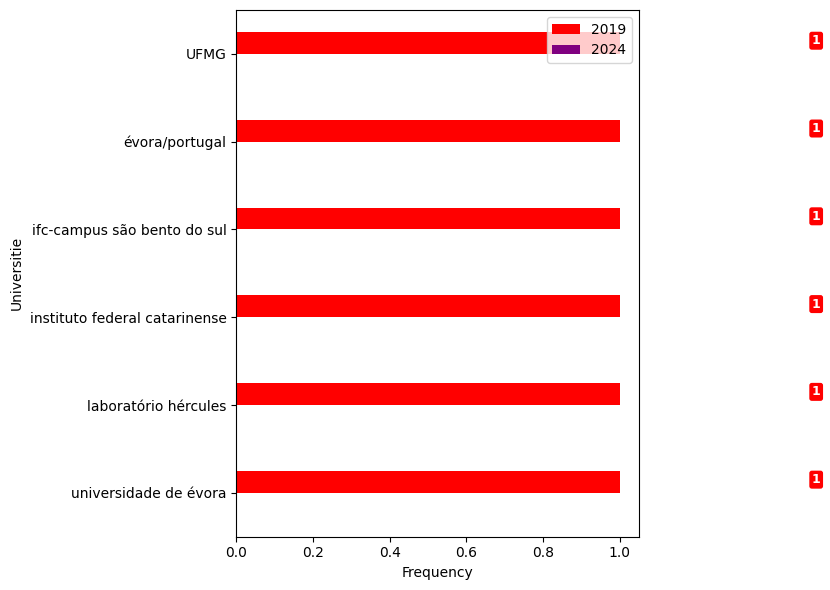

FileNotFoundError: [Errno 2] No such file or directory: 'research_area_évora/portugal_comparison.csv'

In [11]:
calcByArea('HIS')

      Year Area                                      English title  \
115   2019  COL  Formulation and characterization of oil-in-wat...   
146   2019  COL  Stability of silica nanoparticles modified wit...   
219   2019  COL  Balance between CTAB-dye and CTAB-polymer inte...   
269   2019  COL  Synthesis and Characterization of Capsules Bas...   
560   2019  COL  Kinetic sorption of bovine serum albumin onto ...   
820   2019  COL  The Calorimetric Study on the Formation of Inc...   
889   2019  COL  Nano-bio interface on nanobioplasmonic catalys...   
987   2019  COL  Synthesis of CdTe quantum dots: Evaluation of ...   
1003  2019  COL  Dye Adsorption Study from Aqueous Solution on ...   

                                                Authors  \
115    Sarah F.A. Ferreira (IC); Emília C. D. Lima (PQ)   
146    Beatriz P. A. Santos (PG); Celso A. Bertran (PQ)   
219   Wellington J. Reis (IC); Jussara A. Penido (PG...   
269   Joana C. Biazi (IC); Gabriela A. Tonet (PG); M...   
560 

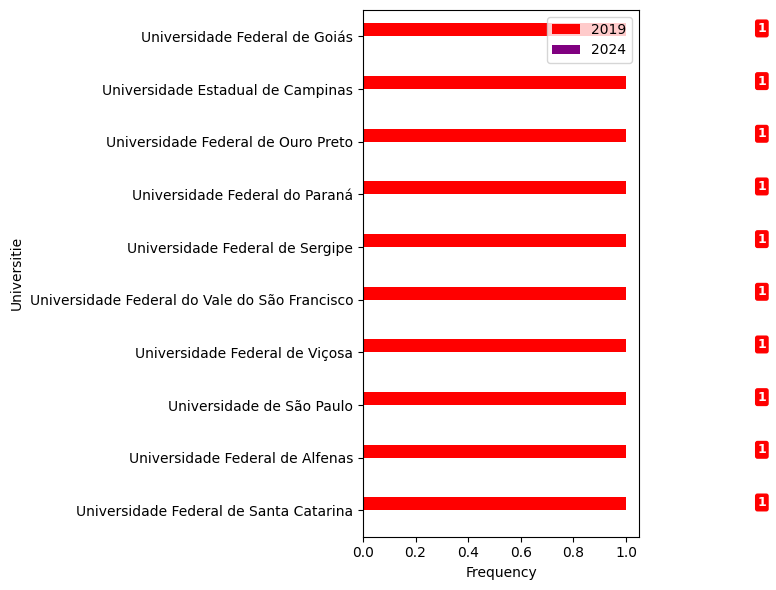

CSV file 'research_area_universitie_comparison.csv' created successfully!
Total abstracts in 2019: 10
Total abstracts in 2024: 0


In [ ]:
calcByArea('COL')

      Year Area                                      English title  \
13    2019  MAT  MCM-22 zeolite using biogenic silica from an a...   
30    2019  MAT  Influence of Cr on mechanical and optical prop...   
36    2019  MAT  Exploring the use of coal fly ash in the synth...   
42    2019  MAT  Synthesis and structural; morphological and te...   
56    2019  MAT  Synthesis of β-Zeolite with different Si/Al mo...   
...    ...  ...                                                ...   
1076  2019  MAT  Structural and thermal evaluation of composite...   
1097  2019  MAT  Core-shell nanofibers as drug carriers for tra...   
1100  2019  MAT  Optimization of optical and photocalitic prope...   
1101  2019  MAT  Study of Sulfonated Nanocellulose Beads as Pot...   
1117  2019  MAT  Highly ordered surface of electrospun PCL fibe...   

                                                Authors  \
13    Jaíne F. Gomes (IC); Anderson J. Schwanke (PQ)...   
30    Juliana C. Neves (PG); Marcelo M. V

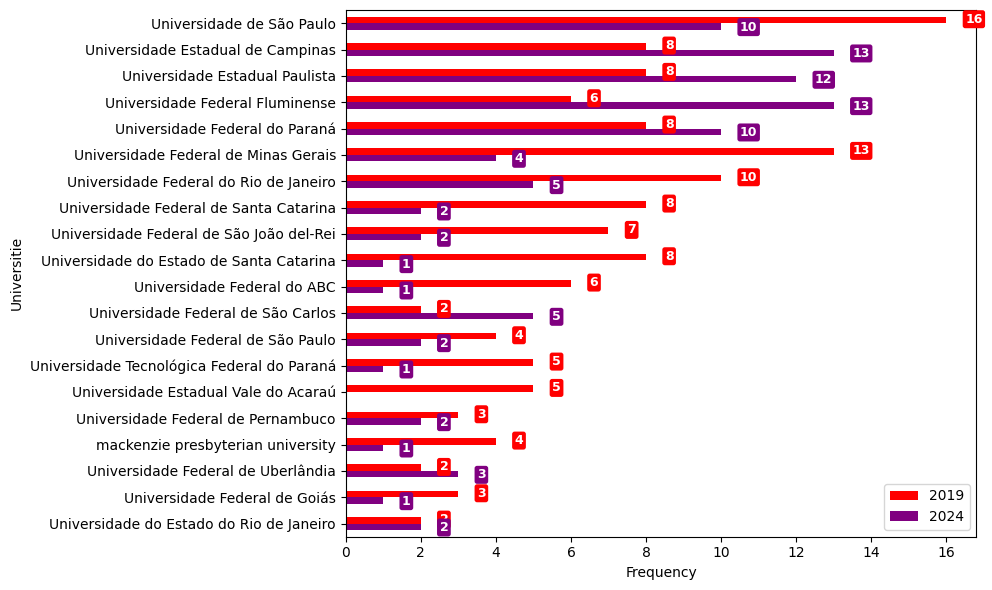

CSV file 'research_area_vale sa_universitie_comparison.csv' created successfully!
Total abstracts in 2019: 282
Total abstracts in 2024: 179


In [ ]:
calcByArea('MAT')

      Year Area                                      English title  \
8     2019  INO  Hydrosilylation with Platinum Catalysts: Influ...   
23    2019  INO  One synthesis; multiple materials: from molybd...   
29    2019  INO  Copper Porphyrins of First and Second Generati...   
32    2019  INO  Synthesis and Characterization of a New Ionic ...   
38    2019  INO  Electrochemical studies of phenanthroline deri...   
...    ...  ...                                                ...   
1060  2019  INO  Study of MIL-101(Cr) Synthetic Routes for Subs...   
1084  2019  INO  Cellular uptake of a Cu(I)-phosphine complex i...   
1103  2019  INO  Emission efficiency intensification of Eu (III...   
1119  2019  INO  Antibacterial Activity of the Nitrosyl Rutheni...   
1121  2019  INO  Preparation and characterization of new gadoli...   

                                                Authors  \
8     William Silva Fernandes (PG); Thiago Messias C...   
23                    Ariane Schmidt; Ald

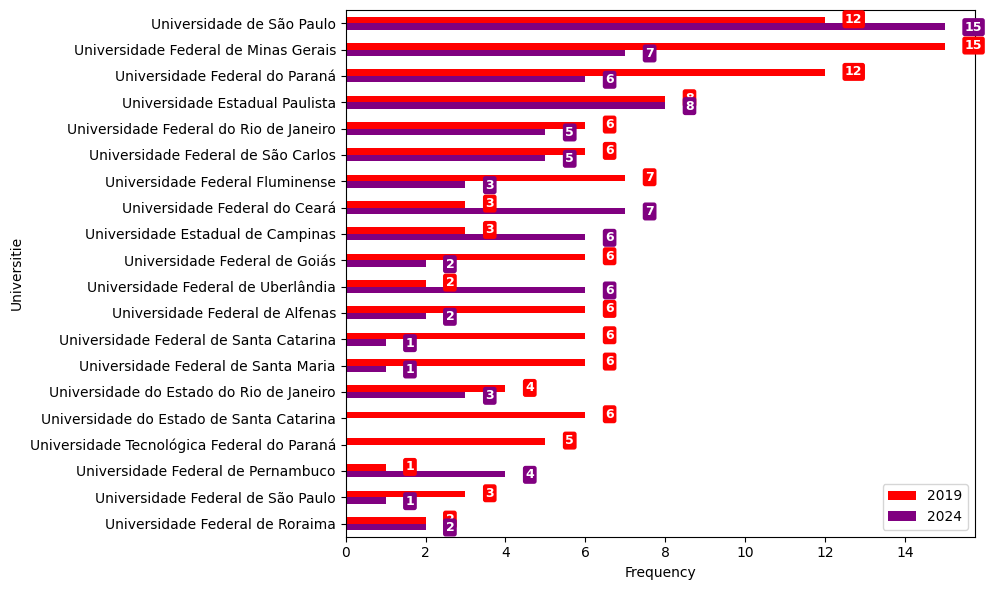

CSV file 'research_area_vnu univesity of science hanoi_universitie_comparison.csv' created successfully!
Total abstracts in 2019: 213
Total abstracts in 2024: 150


In [ ]:
calcByArea('INO')

      Year Area                                      English title  \
11    2019  CAT  Properties of PLA Polymers Produced by Heterog...   
19    2019  CAT  Design of sustainable catalysts derived from g...   
105   2019  CAT  Copper-Supported ZSM-5 Zeolite: Catalysts with...   
140   2019  CAT  Ca2+/Serpentinite: A Catalyst for the Transest...   
177   2019  CAT  Optimization of short chain polyglycerols prod...   
199   2019  CAT  Gold supported on strontium surface-enriched C...   
230   2019  CAT  Reactive dye degradation and decolorization: A...   
289   2019  CAT  Au-Pd Selectivity-Switchable Oxidation Catalys...   
297   2019  CAT  Development of a Heterogeneous Acid Catalyst f...   
424   2019  CAT  High Energy Ball-Milling synthesis of CuO nano...   
518   2019  CAT  Photocatalysis of Ciprofloxacin using tin tita...   
596   2019  CAT  Synthesis of nickel hydroxide and the interact...   
611   2019  CAT  Kinetic evaluation of the effect of stabilizer...   
623   2019  CAT  Syn

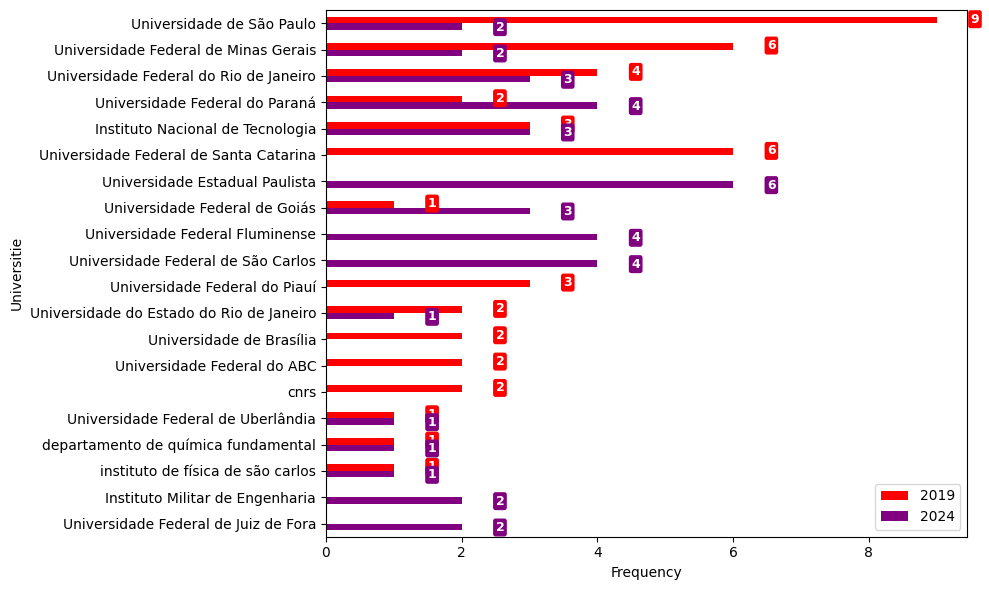

CSV file 'research_area_wolfson catalysis centre_universitie_comparison.csv' created successfully!
Total abstracts in 2019: 82
Total abstracts in 2024: 78


In [ ]:
calcByArea('CAT')